In [1]:
import torch 
import torchvision
import torchvision.models as models
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from einops import rearrange, reduce, repeat

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
normalize = transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                     std=[x / 255.0 for x in [63.0, 62.1, 66.7]])

train_dataset = datasets.CIFAR100('./CIFAR100/',
                          train=True,
                          transform=transforms.Compose([
                                transforms.ToTensor(),
                                normalize]),
                          download=True)

test_dataset = datasets.CIFAR100('./CIFAR100/',
                          train=False,
                          transform=transforms.Compose([
                                transforms.ToTensor(),
                                normalize]),
                          download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
def visualize_data(idx, interpolate=True):
    
    if interpolate:
        img = F.interpolate(test_dataset[idx][0].unsqueeze(0), size=128).squeeze()
        img = img.permute(1,2,0).numpy()
    else:
        img = test_dataset[idx][0].permute(1,2,0).numpy()

    mean = [x / 255.0 for x in [125.3, 123.0, 113.9]]
    std = [x / 255.0 for x in [63.0, 62.1, 66.7]] 

    img = img * np.array(std) + np.array(mean)
    plt.imshow(img)
    plt.show()

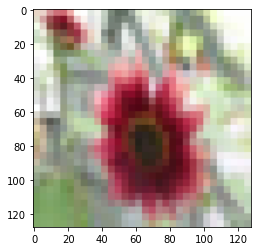

In [4]:
visualize_data(67)

In [5]:
with torch.no_grad():
    clf = model(test_dataset[67][0].unsqueeze(0)).argmax() 
    gt = test_dataset[67][1]
    
clf, gt

NameError: name 'model' is not defined

In [6]:
# Load in a DCA model 
import dca_models as models

checkpoint_path = './runs/dca_cifar100_resnet50_local_deform_shuffle_seed=42_epochs_200_dropout_0.15_cpg_32/model_best.pth.tar'
checkpoint_path = './runs/dca_cifar100_resnet50_local_deform_shuffle_seed=42_epochs_250_dropout_0.15_cpg_16/model_best.pth.tar'
checkpoint = torch.load(checkpoint_path)

arch = 'dca_cifar100_resnet50_local_deform_shuffle'
dca_model = models.__dict__[arch]()
dca_model.load_state_dict(checkpoint['state_dict'])
dca_model.eval()

import eca_models as models 

checkpoint_path = '/storage1/vatsalag/dca_experiments/eca_cifar_resnet50_seed=42/model_best.pth.tar'
checkpoint = torch.load(checkpoint_path)

arch = 'eca_cifar_resnet50'
eca_model = models.__dict__[arch]()
eca_model.load_state_dict(checkpoint['state_dict'])
eca_model.eval()

import csa_models as models 
checkpoint_path = '/storage1/vatsalag/dca_experiments/csa_cifar100_resnet50_/model_best.pth.tar'
checkpoint = torch.load(checkpoint_path)

arch = 'csa_cifar100_resnet50'
csa_model = models.__dict__[arch]()
csa_model.load_state_dict(checkpoint['state_dict'])
csa_model.eval()

Constructing dca_resnet50......
Constructing eca_resnet50......
Constructing csa_resnet50......


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): CSABottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (csa): csa_layer(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (con

In [7]:
checkpoint

{'epoch': 198,
 'arch': 'csa_cifar100_resnet50',
 'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 1.7687e-02, -3.5267e-01, -8.3811e-02],
                         [ 2.8447e-01, -9.1681e-02, -2.2690e-01],
                         [ 1.7948e-01,  2.3903e-01,  7.3555e-02]],
               
                        [[-3.0858e-02, -2.1360e-01,  4.6063e-02],
                         [ 1.6321e-01, -7.1665e-02, -1.3616e-01],
                         [ 4.3286e-02,  1.2501e-01,  3.0535e-02]],
               
                        [[-8.6078e-03, -7.9133e-02,  1.3571e-01],
                         [ 7.6012e-02, -6.5557e-02, -6.2290e-02],
                         [-3.9911e-02,  2.5444e-02,  5.5472e-03]]],
               
               
                       [[[ 2.5139e-01, -3.0574e-01, -1.1756e-02],
                         [-3.0486e-01,  1.2769e-01,  2.4985e-01],
                         [ 6.5358e-02,  1.7278e-01, -2.1645e-01]],
               
                        [[ 2.

In [8]:
dca_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): DCABottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (dca): dca_layer(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (max

In [9]:
import random 
import string 

idx = 93

activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook 

name = string.ascii_letters
name = ''.join(random.choice(name) for i in range(10))

dca_model.layer3[4].dca.conv_offset_local.register_forward_hook(get_activation(name))

input_img = F.interpolate(train_dataset[idx][0].unsqueeze(0), size=32)
with torch.no_grad():
    output_feats = dca_model(input_img).argmax()
    
# output_feats, test_dataset[idx][1]
offsets = activation[name]
offsets.permute(0,2,1).max(dim=1)

torch.return_types.max(
values=tensor([[0.2124, 0.0656, 0.2204]]),
indices=tensor([[794, 794, 794]]))

In [16]:
torch.set_printoptions(profile='full')
offsets.permute(0, 2, 1)

tensor([[[-3.1717e-03, -2.3687e-03, -7.5485e-03],
         [ 1.1292e-01, -7.8662e-02, -8.0145e-02],
         [-1.0102e-02, -2.0111e-02, -5.0457e-02],
         [ 1.0030e-01,  2.9680e-02,  1.0093e-01],
         [ 3.5648e-04,  1.3963e-02,  2.5437e-02],
         [-2.3976e-03, -5.5241e-03, -9.4700e-03],
         [-2.7649e-02,  7.1680e-03, -2.0296e-03],
         [ 1.8199e-03,  9.4778e-03,  1.8761e-02],
         [-1.8363e-02,  2.6313e-03, -3.8200e-03],
         [-2.2639e-02,  1.2204e-02,  1.0453e-02],
         [-1.0332e-02,  6.9870e-03,  8.6425e-03],
         [-3.0502e-02,  9.7267e-03,  2.4054e-03],
         [-1.1692e-02,  5.5284e-03,  5.3218e-03],
         [-1.0693e-02, -6.9358e-03, -1.6740e-02],
         [ 9.8908e-04, -1.0348e-02, -1.8032e-02],
         [-1.2058e-02,  1.4012e-02,  1.7280e-02],
         [ 1.8478e-02,  6.4644e-04,  1.2164e-02],
         [-2.7604e-02,  2.5218e-03, -9.9334e-03],
         [ 8.6559e-03,  2.8933e-04,  5.7269e-03],
         [ 1.9849e-03, -1.2651e-02, -2.1227e-02],


In [17]:
model = dca_model
base_model = list(model.children())[:4]
conv5_3_model = nn.Sequential(*base_model)

In [18]:
idx = 789
# idx = 67
# idx = 129

input_img = F.interpolate(test_dataset[idx][0].unsqueeze(0), size=128)
with torch.no_grad():
    conv5_3_feats = conv5_3_model(input_img)
    clf = model(test_dataset[idx][0].unsqueeze(0)).argmax() 
    gt = test_dataset[idx][1]

conv5_3_feats.shape, clf, gt

(torch.Size([1, 64, 66, 66]), tensor(14), 14)

In [19]:
conv5_3_feats.shape, 512 // 32

(torch.Size([1, 64, 66, 66]), 16)

IndexError: index 2 is out of bounds for dimension 0 with size 2

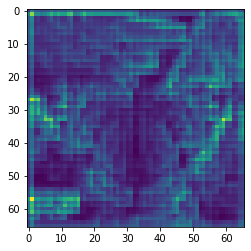

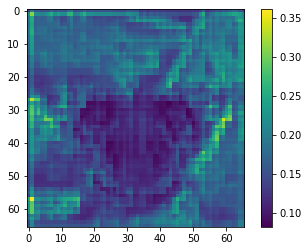

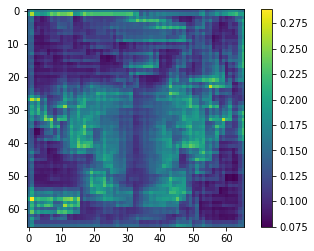

<Figure size 432x288 with 0 Axes>

In [20]:
b, c, h, w = conv5_3_feats.shape 

mean = torch.mean(conv5_3_feats, dim=1)
plt.figure()
plt.imshow(mean.squeeze().numpy())

cpg = 32
mean = torch.mean(conv5_3_feats.view(b, cpg, c // cpg, h, w), dim=1)

for i in range(0, 16):
    plt.figure()
    plt.imshow(mean.squeeze()[i].numpy())
    plt.colorbar()

plt.show()

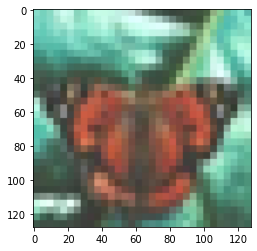

In [762]:
visualize_data(idx)